# Quicklooks

### Introduction:

In addition to data processing and wind retrieval, lidarwind also has a basic visualisation module. This example shows how to use this module to quickly check the data and the retrieved wind profiles. This example follows the steps listed below. 

### Steps:

0. Download  pre-processed data from zenodo
1. Read the pre-processed and merge all data
2. Visualising variables from vertically pointing observations
3. Preparing the data for wind retrieval
4. Visualising radial observations for each azimuth
5. Applying the FFT-based method to retrieve wind
6. Visualising wind speed and direction

In [1]:
import pooch
import pandas as pd
import matplotlib as mpl 
import lidarwind as lst

In [2]:
mpl = lst.PlotSettings(mpl, style='dark_background').update_settings().mpl

## Step 0: Download pre-processed data from zenodo

In [3]:
def sample_downloader(date):

    formated_date = date.strftime("%Y%m%d_%H")
    file_path = pooch.retrieve( 
        url=f"doi:10.5281/zenodo.7404576/cmtrace_windcube_{formated_date}_fixed_50m.zip",
        known_hash=None, processor=pooch.Unzip())
    
    return file_path[0]

In [4]:
date_range = pd.date_range(start='20210921 01', end='20210921 23', freq='H')

file_list = []
for date in date_range:
    file_list.append(sample_downloader(date))

## Step 1: Read the pre-processed and merge all data

In [5]:
fileList = sorted(file_list)
merged_data = lst.ReadProcessedData(fileList).merge_data()

## Step 2: Visualising variables from vertically pointing observations

In [6]:
lst.Visualizer(merged_data).view_orig_var('doppler_spectrum_width90', vmin=0.6, vmax=1.5, 
                                       cmap='turbo', show=True)

lst.Visualizer(merged_data).view_orig_var('radial_wind_speed90', vmin=-2, vmax=0.5, show=True)

lst.Visualizer(merged_data).view_orig_var('cnr90', vmin=-30, vmax=-5, cmap='turbo', show=True)

## Step 3: Preparing the data for wind retrieval

In [7]:
transfd_data = lst.GetRestructuredData(merged_data)

## Step 4: Visualising radial observations for each azimuth

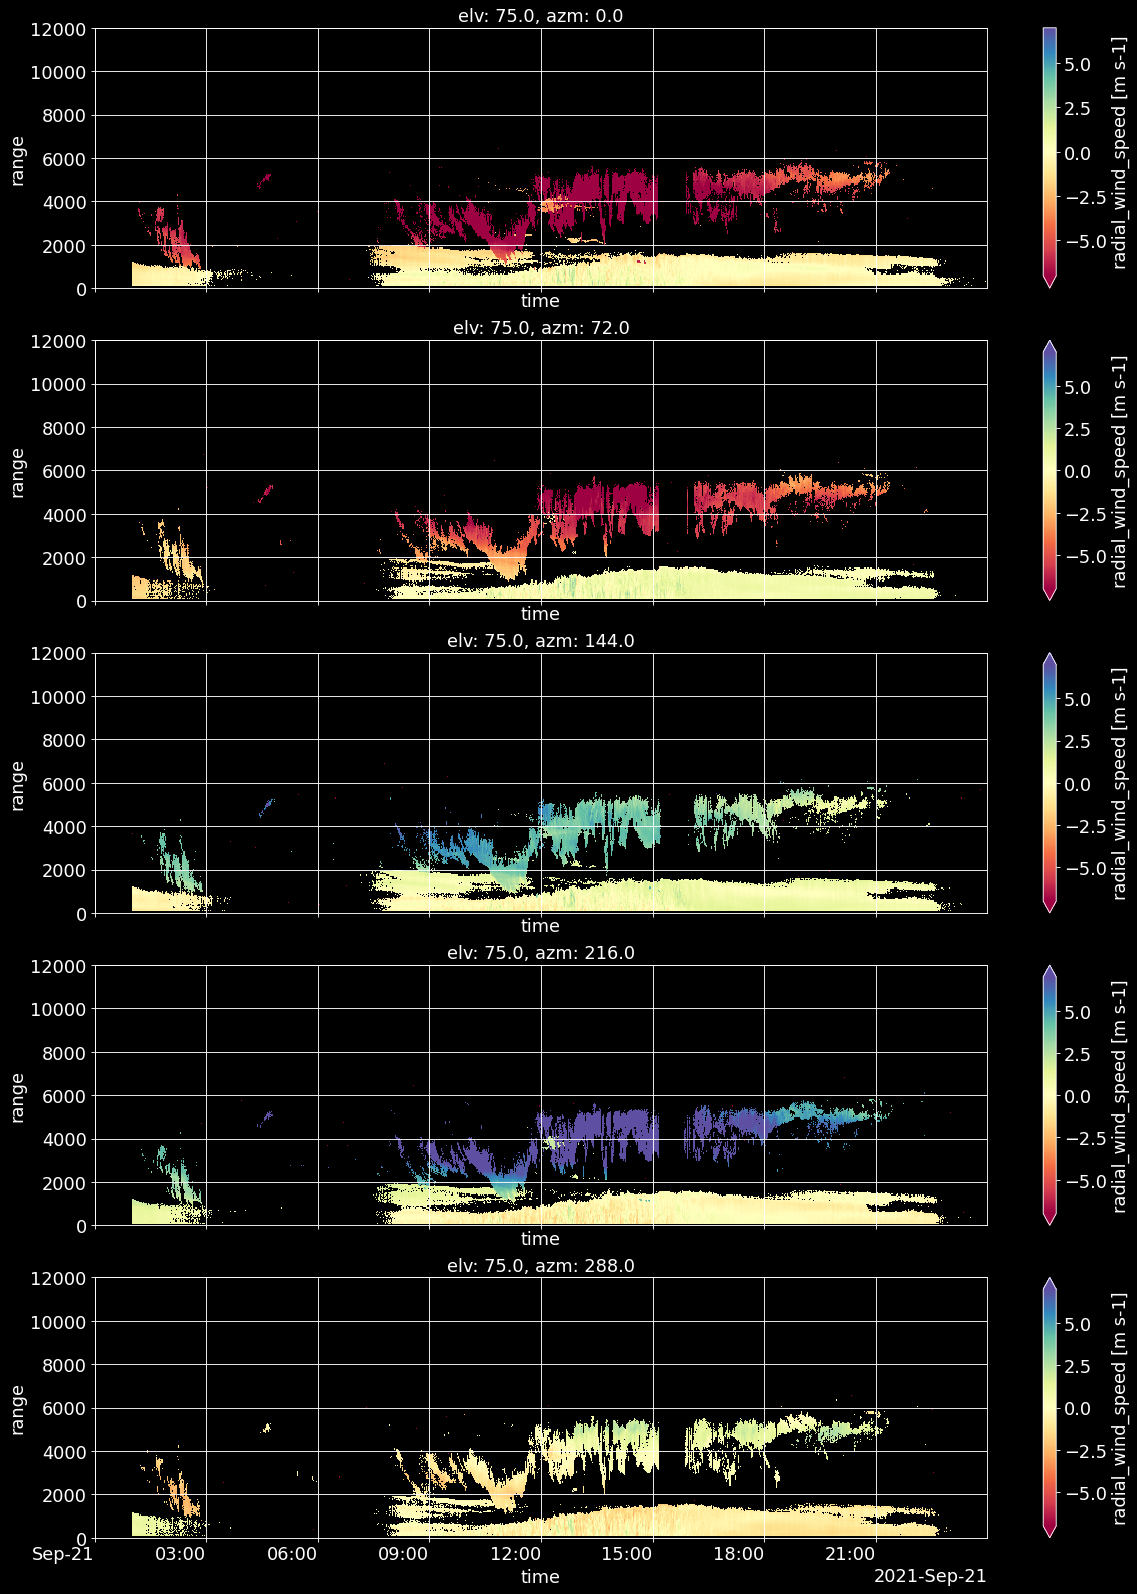

In [8]:
lst.Visualizer(transfd_data.data_transf).view_orig_var('radial_wind', vmin=-7, vmax=7, 
                                                   plot_id='rad_wind_speed_panel', show=True)

## Step 5: Applying the FFT-based method to retrieve wind

In [9]:
wind_prop = lst.FourierTransfWindMethod(transfd_data.data_transf).wind_prop()

/opt/miniconda3/envs/lidarSuit/lib/python3.8/site-packages/xrft/xrft.py:338: FutureWarning: Flags true_phase and true_amplitude will be set to True in future versions of xrft.dft to preserve the theoretical phasing and amplitude of Fourier Transform. Consider using xrft.fft to ensure future compatibility with numpy.fft like behavior and to deactivate this warning.
  warnings.warn(msg, FutureWarning)


## Step 6: Visualising wind speed and direction

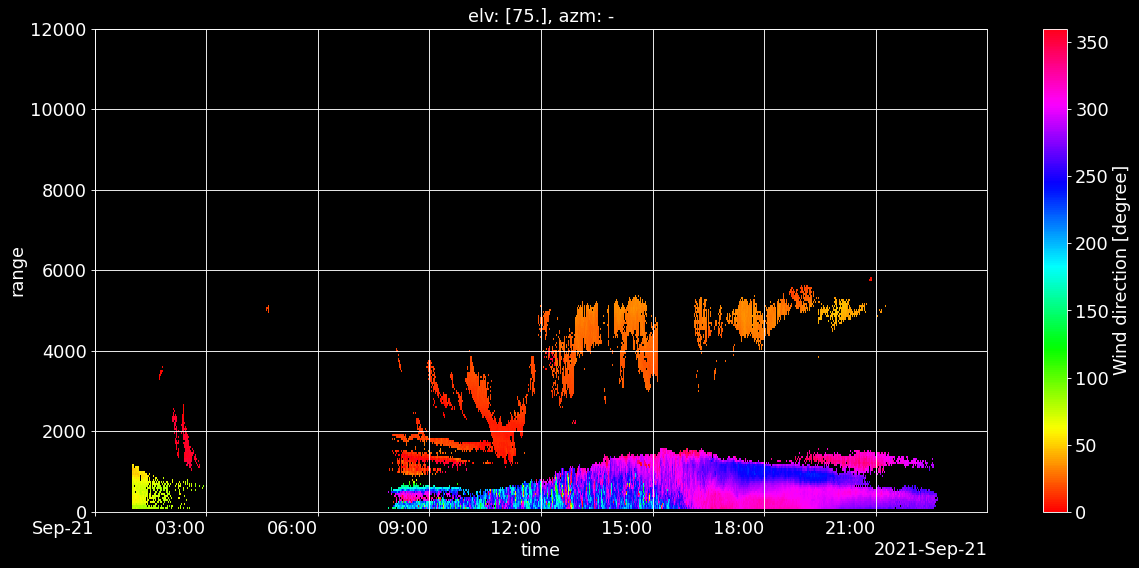

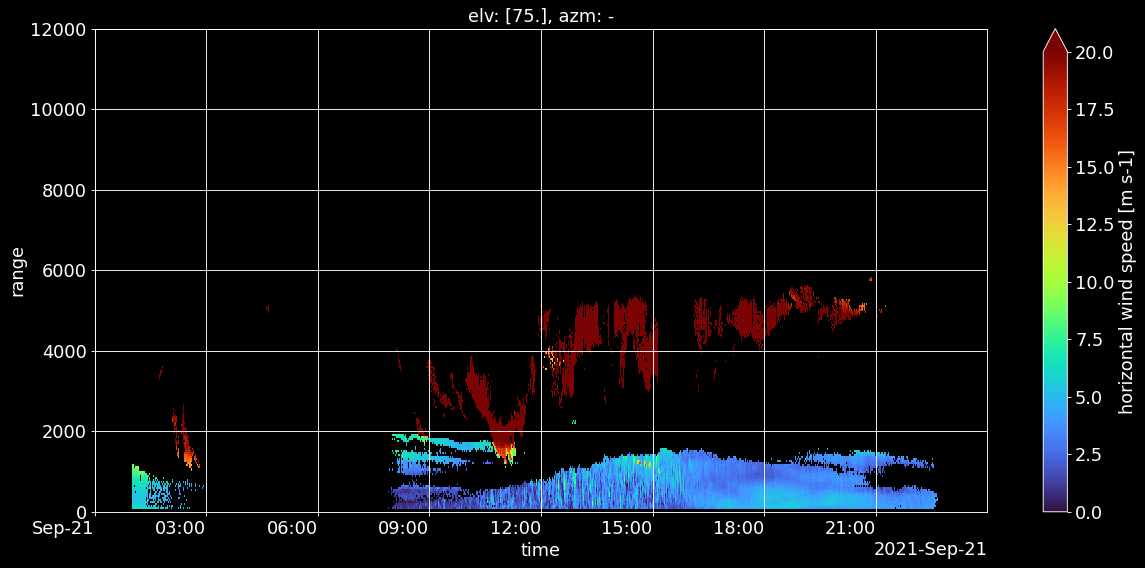

In [10]:
lst.Visualizer(wind_prop).view_ret_var('horizontal_wind_direction', vmin=0, vmax=360, 
                                    cmap='hsv', elv=wind_prop.elv.values, show=True)

lst.Visualizer(wind_prop).view_ret_var('horizontal_wind_speed', vmin=0, vmax=20, 
                                    cmap='turbo', elv=wind_prop.elv.values, show=True)